# Master Thesis 

Part 1 - Literature Review

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
labels = ['USDT', 'USDC', 'DAI', 'FDUSD', 'PYUSD', 'USDD', 'TUSD', 'USDe', 
          'FRAX', 'USDY']
sizes = [118230326949, 34809276276, 5365314377, 2795850692, 917157158, 
         751795977, 495003800, 2713756246, 647226249, 340045084, 
        ]

In [7]:
def custom_labels(sizes, labels):
    top_4 = sorted(sizes, reverse=True)[:4]
    return [label if size in top_4 else '' for label, size in zip(labels, sizes)]

# Create a function to label only the top 4 stablecoins with percentages for purpose of space 
def autopct_format(values):
    def custom_format(pct):
        total = sum(values)
        value = int(round(pct * total / 100.0))
        if value >= sorted(values, reverse=True)[3]:  # Show % for top 4 only
            return f'{pct:.1f}%'
        else:
            return ''
    return custom_format

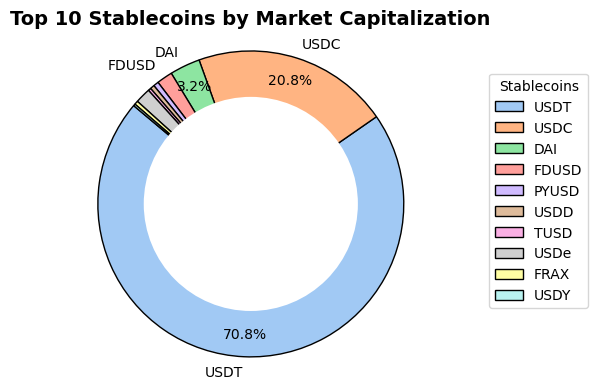

In [10]:
#create and format the donut chart
colors = sns.color_palette('pastel', len(labels))
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=custom_labels(sizes, labels), colors=colors, autopct=autopct_format(sizes), 
        startangle=140, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, textprops={'fontsize': 10})


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')

plt.title('Top 10 Stablecoins by Market Capitalization', fontsize=14, weight='bold')


plt.legend(labels, title="Stablecoins", bbox_to_anchor=(1, 0.9), fontsize=10)


plt.tight_layout()
plt.show()

The Stablecoin Trilemma

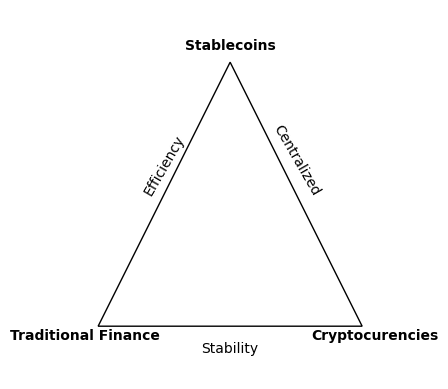

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, ax = plt.subplots()

vertices = [(0.5, 1), (0, 0), (1, 0)]


triangle = patches.Polygon(vertices, closed=True, fill=None, edgecolor='black')
ax.add_patch(triangle)


ax.text(0.5, 1.05, 'Stablecoins', ha='center', fontweight='bold')
ax.text(-0.05, -0.05, 'Traditional Finance', ha='center', fontweight='bold')
ax.text(1.05, -0.05, 'Cryptocurencies', ha='center', fontweight='bold')


ax.text(0.25, 0.5, 'Efficiency', ha='center', rotation=60)
ax.text(0.75, 0.5, 'Centralized', ha='center', rotation=-60)
ax.text(0.5, -0.1, 'Stability', ha='center')


ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect('equal')


ax.axis('off')

plt.show()

Part 3- Methodology and Data Collecion

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/annabock/Desktop/USDT.csv")
df.head()

,Date,USDT Dominance (%)
0,1/1/2018,0.48%
1,2/1/2018,0.56%
2,3/1/2018,0.96%
3,4/1/2018,0.64%
4,5/1/2018,0.83%


In [15]:
#Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df['USDT Dominance (%)'] = df['USDT Dominance (%)'].str.replace('%', '')
df['USDT Dominance (%)'] = df['USDT Dominance (%)'].astype(float)
df.head()

,Date,USDT Dominance (%)
0,2018-01-01,0.48
1,2018-02-01,0.56
2,2018-03-01,0.96
3,2018-04-01,0.64
4,2018-05-01,0.83


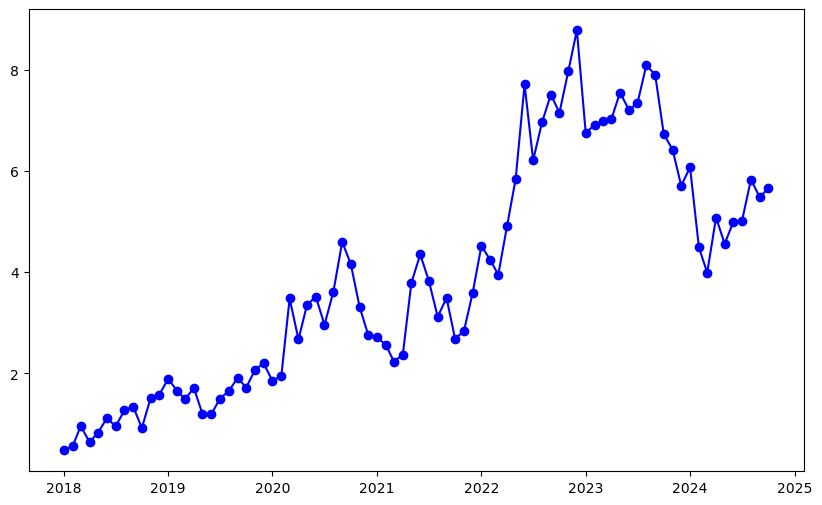

In [16]:
#plot only USDT Dominance 
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['USDT Dominance (%)'], label='USDT Dominance', color='blue', marker='o')

In [17]:
#plot with trendline following the local minima 

from scipy.signal import argrelextrema

In [18]:
usdt_dominance = df['USDT Dominance (%)'].values

In [19]:
minima_indices = argrelextrema(usdt_dominance, np.less)[0]

In [20]:
minima_dates = df['Date'].iloc[minima_indices]
minima_values = usdt_dominance[minima_indices]

In [21]:
trendline = np.interp(df['Date'].map(pd.Timestamp.timestamp), 
                      minima_dates.map(pd.Timestamp.timestamp), 
                      minima_values)

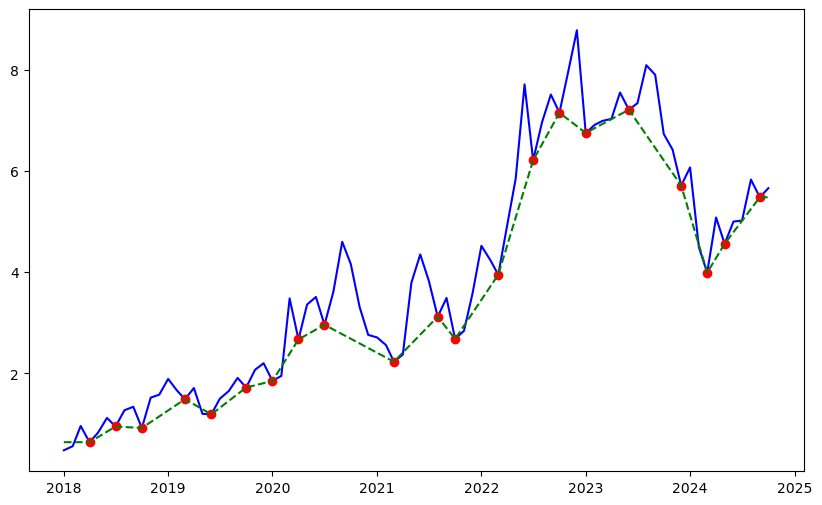

In [22]:
# Plot the data and the trendline
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['USDT Dominance (%)'], label='USDT Dominance (%)', color='blue')
plt.plot(minima_dates, minima_values, 'ro', label='Local Minima')  # Plot local minima points
plt.plot(df['Date'], trendline, label='Minima Trendline', color='green', linestyle='--')  # Plot trendline


In [23]:
minima_indices = argrelextrema(usdt_dominance, np.less)[0]
minima_dates = df['Date'].iloc[minima_indices]
minima_values = usdt_dominance[minima_indices]

In [24]:
#Plot of final trendline used for prediction 
trendline = np.interp(df['Date'].map(pd.Timestamp.timestamp), 
                      minima_dates.map(pd.Timestamp.timestamp), 
                      minima_values)

In [25]:
jan_2018_minima = df[df['Date'] == '2018-01-01']['USDT Dominance (%)'].values[0]
march_2024_minima = df[df['Date'] == '2024-03-01']['USDT Dominance (%)'].values[0]

start_date = pd.Timestamp('2018-01-01').timestamp()
end_date = pd.Timestamp('2024-03-01').timestamp()

slope = (march_2024_minima - jan_2018_minima) / (end_date - start_date)

def straight_trendline(x):
    return jan_2018_minima + slope * (x - start_date)

In [26]:
timestamps = df['Date'].map(pd.Timestamp.timestamp)
extended_trendline = straight_trendline(timestamps)

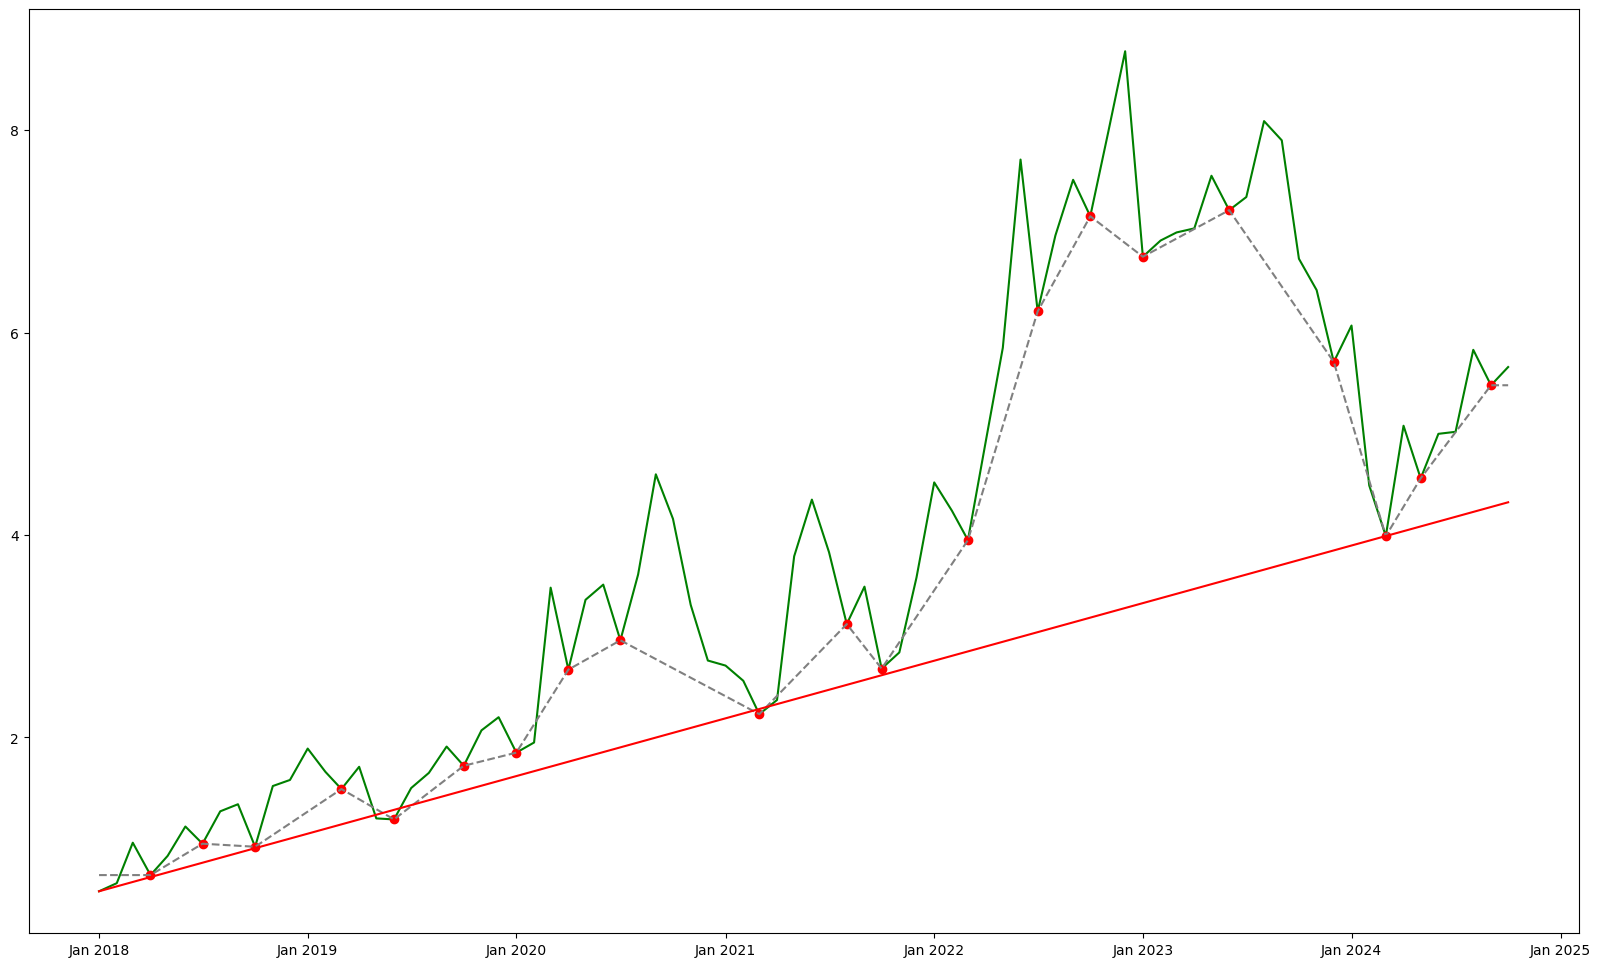

In [27]:
#create and show plot 
plt.figure(figsize=(20,12))
plt.plot(df['Date'], df['USDT Dominance (%)'], label='USDT Dominance', color='green')
plt.plot(minima_dates, minima_values, 'ro', label='Local Minima')  # Local minima points
plt.plot(df['Date'], trendline, label='Minima Trendline', color='grey', linestyle='--')  # Local minima trendline
plt.plot(df['Date'], extended_trendline, label='Straight Trendline (Jan 2018 - Mar 2024)', color='red', linestyle='-')  # Straight trendline
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))


Put more Details in plot 

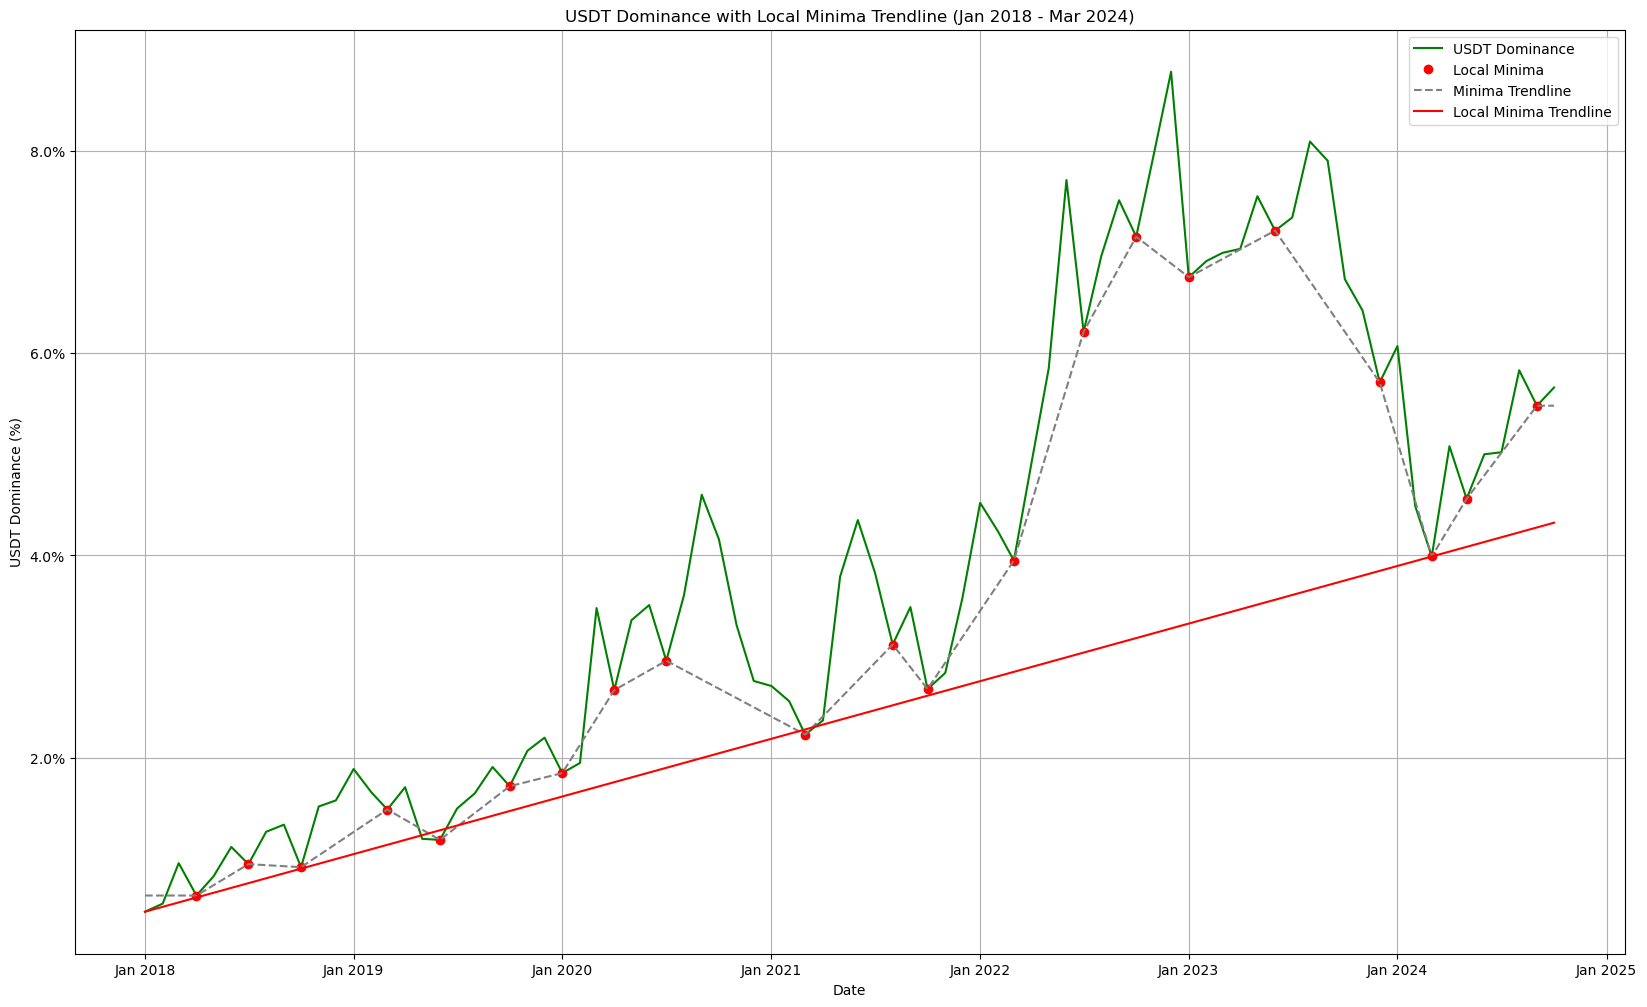

In [28]:
plt.figure(figsize=(20,12))
plt.plot(df['Date'], df['USDT Dominance (%)'], label='USDT Dominance', color='green')
plt.plot(minima_dates, minima_values, 'ro', label='Local Minima')  # Local minima points
plt.plot(df['Date'], trendline, label='Minima Trendline', color='grey', linestyle='--')  # Local minima trendline
plt.plot(df['Date'], extended_trendline, label='Local Minima Trendline', color='red', linestyle='-')  # Straight trendline

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())


plt.xlabel('Date')
plt.ylabel('USDT Dominance (%)')


plt.title('USDT Dominance with Local Minima Trendline (Jan 2018 - Mar 2024)')


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))


plt.legend()
plt.grid(True)

plt.show()

Fining the Dates the USDT Dominance Line touches 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/annabock/Desktop/USDT.csv")
df.head()

,Date,USDT Dominance (%)
0,1/1/2018,0.48%
1,2/1/2018,0.56%
2,3/1/2018,0.96%
3,4/1/2018,0.64%
4,5/1/2018,0.83%


In [31]:
#Cleaning Data
df['Date'] = pd.to_datetime(df['Date'])
df['USDT Dominance (%)'] = df['USDT Dominance (%)'].str.replace('%', '')
df['USDT Dominance (%)'] = df['USDT Dominance (%)'].astype(float)
df.head()

,Date,USDT Dominance (%)
0,2018-01-01,0.48
1,2018-02-01,0.56
2,2018-03-01,0.96
3,2018-04-01,0.64
4,2018-05-01,0.83


In [35]:
df['Date_num'] = (df['Date'] - pd.Timestamp("2018-01-01")).dt.total_seconds()
df.head()

,Date,USDT Dominance (%),Date_num
0,2018-01-01,0.48,0.0
1,2018-02-01,0.56,2678400.0
2,2018-03-01,0.96,5097600.0
3,2018-04-01,0.64,7776000.0
4,2018-05-01,0.83,10368000.0


In [36]:
# Get y-values at starting and ending dates
y_start = df.loc[df['Date'] == pd.Timestamp("2018-01-01"), 'USDT Dominance (%)'].values[0]
y_end = df.loc[df['Date'] == pd.Timestamp("2024-03-01"), 'USDT Dominance (%)'].values[0]
y_start

0.48

In [37]:
x_start = df.loc[df['Date'] == pd.Timestamp("2018-01-01"), 'Date_num'].values[0]
x_end = df.loc[df['Date'] == pd.Timestamp("2024-03-01"), 'Date_num'].values[0]
slope = (y_end - y_start) / (x_end - x_start)
intercept = y_start - slope * x_start

In [38]:
df['Line_value'] = slope * df['Date_num'] + intercept
df['Touch'] = np.isclose(df['USDT Dominance (%)'], df['Line_value'], atol=0.1)  # low tolerance as needed

In [39]:
touch_dates = df.loc[df['Touch'], 'Date']
touch_dates_list = touch_dates.tolist()

In [40]:
touch_dates_list

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00')]

Bitcoin and USDT Dominance charts

In [42]:
df = pd.read_csv("/Users/annabock/Desktop/USDT_BTC1.csv", sep = ';')
df.head()

,Date,USDT Dominance (%),BTC,Column1
0,10/01/2024,5.66%,"66642,41",NaN
1,09/01/2024,5.48%,"63329,5",NaN
2,08/01/2024,5.83%,"58969,9",NaN
3,07/01/2024,5.02%,"64619,25",NaN
4,06/01/2024,5.00%,"62678,29",NaN


In [44]:
# Data Cleaning 
df['Date'] = pd.to_datetime(df['Date'])
df['BTC '] = pd.to_numeric(df['BTC '].astype(str).str.replace(',', '.'), errors='coerce')
df['USDT Dominance (%)'] = pd.to_numeric(df['USDT Dominance (%)'].astype(str).str.replace('%', '').str.replace(',', '.'), errors='coerce')
df

,Date,USDT Dominance (%),BTC,Column1
0,2024-10-01,5.66,66642.41,NaN
1,2024-09-01,5.48,63329.50,NaN
2,2024-08-01,5.83,58969.90,NaN
3,2024-07-01,5.02,64619.25,NaN
4,2024-06-01,5.00,62678.29,NaN
...,...,...,...,...
77,2018-05-01,0.83,7494.17,NaN
78,2018-04-01,0.64,9240.55,NaN
79,2018-03-01,0.96,6973.53,NaN
80,2018-02-01,0.56,10397.90,NaN


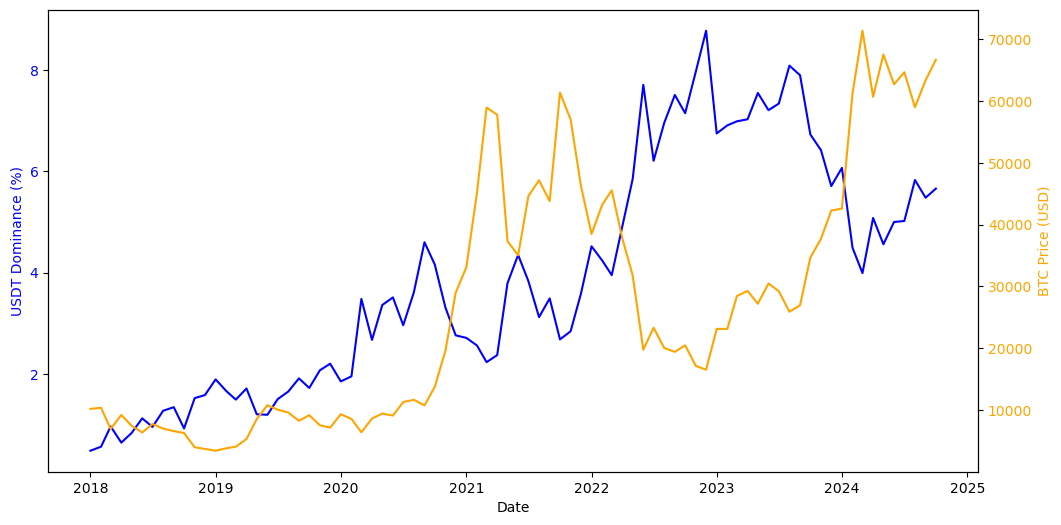

In [45]:
#create and format plot 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df['Date'], df['USDT Dominance (%)'], color='blue', label='USDT Dominance (%)')
ax1.set_xlabel('Date')
ax1.set_ylabel('USDT Dominance (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['BTC '], color='orange', label='BTC Price')
ax2.set_ylabel('BTC Price (USD)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

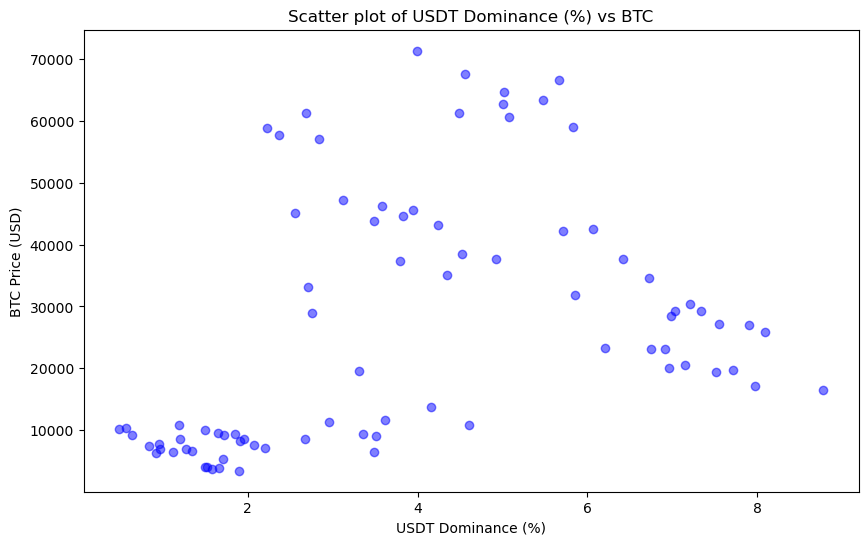

In [47]:
#Scatter plot showing outliers 
plt.figure(figsize=(10, 6))
plt.scatter(df['USDT Dominance (%)'], df['BTC '], color='blue', alpha=0.5)
plt.title('Scatter plot of USDT Dominance (%) vs BTC')
plt.xlabel('USDT Dominance (%)')
plt.ylabel('BTC Price (USD)')
plt.show()

TRADING STRATEGY

1. Buy and Hold 

In [62]:
initial_investment = 100

# Retrieve Bitcoin prices on the start and end dates
initial_btc_price = df.loc[df['Date'] == '2018-01-01', 'BTC '].values[0]
final_btc_price = df.loc[df['Date'] == '2024-03-01', 'BTC '].values[0]

# Calculate initial BTC holdings based on initial investment
btc_holdings = initial_investment / initial_btc_price

# Calculate the final value of this BTC holding on the end date
final_value = btc_holdings * final_btc_price

print(f"Value of $100 investment on Jan 1, 2018, held until March 1, 2024: ${final_value:.2f}")

Value of $100 investment on Jan 1, 2018, held until March 1, 2024: $697.91


In [63]:
initial_btc_price = df.loc[df['Date'] == '2018-01-01', 'BTC '].values[0]
initial_btc_holdings = initial_investment / initial_btc_price
buy_and_hold_value = initial_btc_holdings * final_price
buy_and_hold_gains = (buy_and_hold_value - initial_investment) / initial_investment * 100
print(f"Buy-and-Hold Gains: {buy_and_hold_gains:.2f}%")

Buy-and-Hold Gains: 597.91%


2. USDT Trading Strategy 

In [58]:
df = pd.DataFrame(df).sort_values(by="Date").reset_index(drop=True)

In [59]:
sell_dates = [
    pd.Timestamp('2018-02-01'), pd.Timestamp('2018-04-01'), pd.Timestamp('2018-10-01'),
    pd.Timestamp('2019-06-01'), pd.Timestamp('2021-03-01'), pd.Timestamp('2021-04-01'),
    pd.Timestamp('2021-10-01')
]

In [60]:
buy_ranges = [
    (pd.Timestamp('2018-05-01'), pd.Timestamp('2018-09-01')),
    (pd.Timestamp('2018-11-01'), pd.Timestamp('2019-05-01')),
    (pd.Timestamp('2019-07-01'), pd.Timestamp('2021-02-01')),
    (pd.Timestamp('2021-05-01'), pd.Timestamp('2021-09-01')),
    (pd.Timestamp('2021-11-01'), pd.Timestamp('2024-02-01'))
]
extra_buys = [pd.Timestamp('2018-03-01')]

In [61]:
btc_holdings = 100 / df['BTC '][0]  # Buy BTC with $100 on Jan 1, 2018
usd_balance = 0  # Start with $0 in cash after initial investment

portfolio_history = []

In [66]:
import random
for start, end in buy_ranges:
    random_month = random.choice(pd.date_range(start=start, end=end, freq='MS'))
    extra_buys.append(random_month)

extra_buys = sorted(extra_buys)
for i in range(len(df)):
    date = df['Date'][i]
    btc_price = df['BTC '][i]
    transaction_type = 'Hold'  # Default action is to hold

    # Sell half of BTC holdings on specified sell dates
    if date in sell_dates:
        sell_amount_btc = btc_holdings / 2
        usd_balance += sell_amount_btc * btc_price  # Convert BTC to USD
        btc_holdings -= sell_amount_btc
        transaction_type = 'Sell 50%'

    # Buy $100 of BTC on specified extra buy dates
    elif date in extra_buys:
        additional_btc = 100 / btc_price
        btc_holdings += additional_btc
        transaction_type = 'Invest $100'

    # Track portfolio value (BTC and USD) on each date
    total_value = btc_holdings * btc_price + usd_balance
    portfolio_history.append({
        'Date': date,
        'BTC Holdings': btc_holdings,
        'USD Balance': usd_balance,
        'Total Value': total_value,
        'Transaction': transaction_type
    })

# Convert to DataFrame for result analysis
portfolio_df = pd.DataFrame(portfolio_history)
print(portfolio_df)

final_btc_value = btc_holdings * df['BTC '].iloc[-1]
final_usd_balance = usd_balance
final_portfolio_value = final_btc_value + final_usd_balance

print("\nFinal Portfolio Summary:")
print(f"BTC Holdings Value on March 1, 2024: ${final_btc_value:.2f}")
print(f"USD Balance on March 1, 2024: ${final_usd_balance:.2f}")
print(f"Total Portfolio Value on March 1, 2024: ${final_portfolio_value:.2f}")

         Date  BTC Holdings  USD Balance  Total Value  Transaction
0  2018-01-01      0.009784     0.000000   100.000000         Hold
1  2018-02-01      0.004892    50.864878   101.729755     Sell 50%
2  2018-03-01      0.019232    50.864878   184.978280  Invest $100
3  2018-04-01      0.009616   139.720995   228.577113     Sell 50%
4  2018-05-01      0.009616   139.720995   211.784114         Hold
..        ...           ...          ...          ...          ...
77 2024-06-01      0.008079  1774.483019  2280.852582         Hold
78 2024-07-01      0.008079  1774.483019  2296.533339         Hold
79 2024-08-01      0.008079  1774.483019  2250.892992         Hold
80 2024-09-01      0.008079  1774.483019  2286.113621         Hold
81 2024-10-01      0.008079  1774.483019  2312.878179         Hold

[82 rows x 5 columns]

Final Portfolio Summary:
BTC Holdings Value on March 1, 2024: $538.40
USD Balance on March 1, 2024: $1774.48
Total Portfolio Value on March 1, 2024: $2312.88


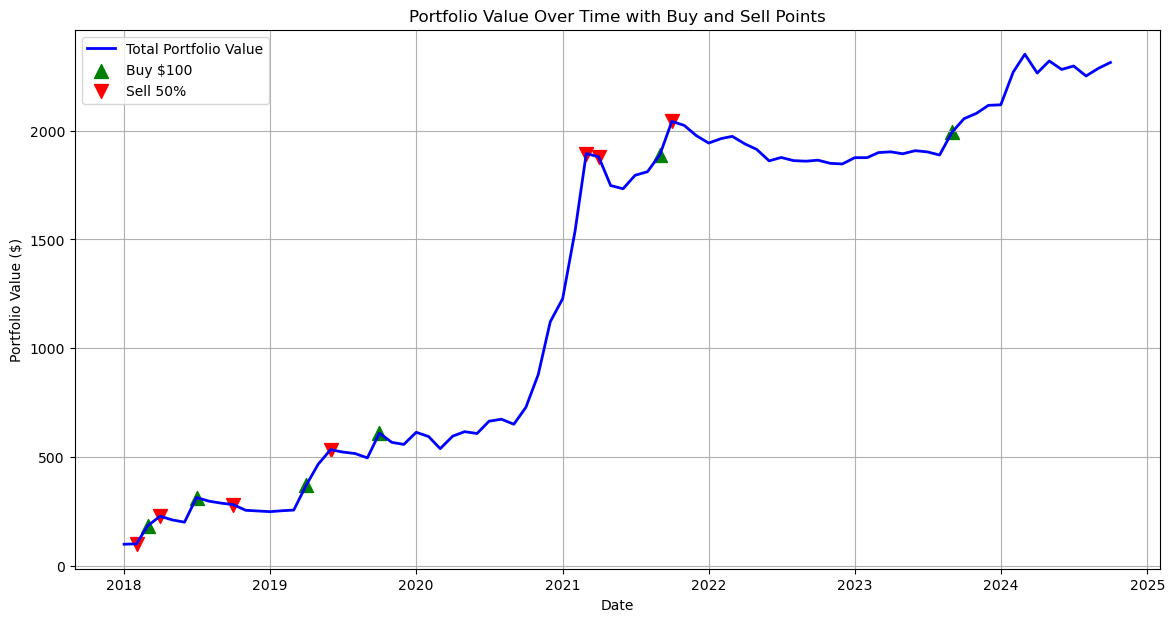

In [67]:
#Create the plot to simplify when to hold and when to buy 
import matplotlib.pyplot as plt

portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])


plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Date'], portfolio_df['Total Value'], label='Total Portfolio Value', color='blue', linewidth=2)

buy_points = portfolio_df[portfolio_df['Transaction'] == 'Invest $100']
sell_points = portfolio_df[portfolio_df['Transaction'] == 'Sell 50%']
plt.scatter(buy_points['Date'], buy_points['Total Value'], color='green', label='Buy $100', marker='^', s=100)
plt.scatter(sell_points['Date'], sell_points['Total Value'], color='red', label='Sell 50%', marker='v', s=100)

plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time with Buy and Sell Points')
plt.legend()
plt.grid()


plt.show()